<a href="https://colab.research.google.com/github/Prem386/Machine-Learning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

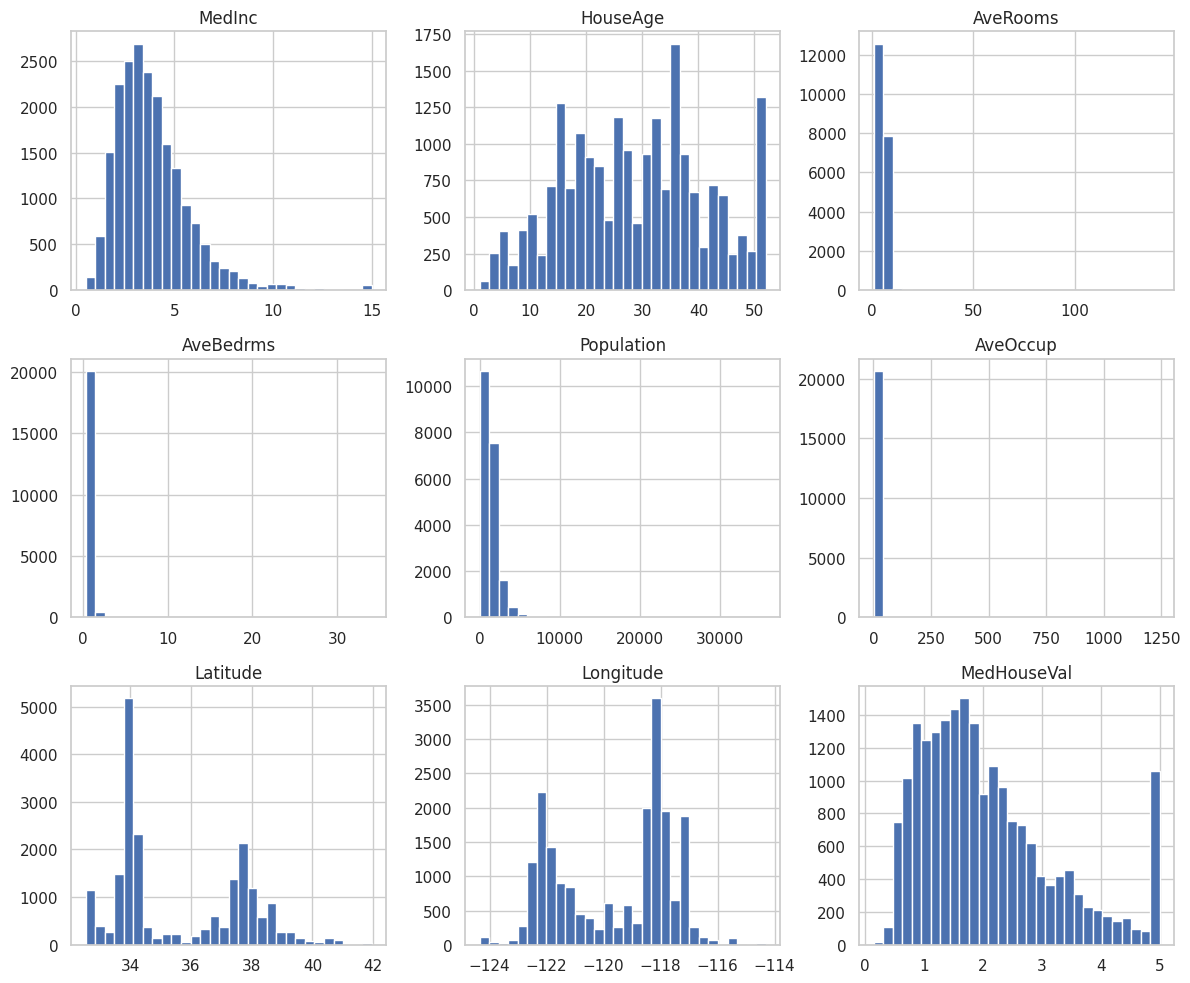

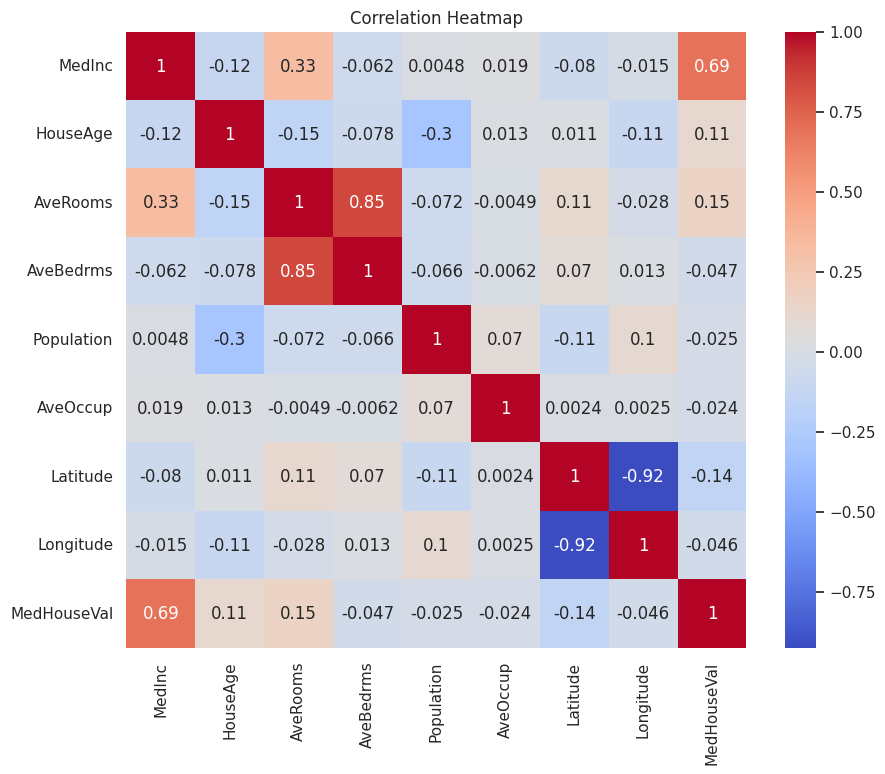

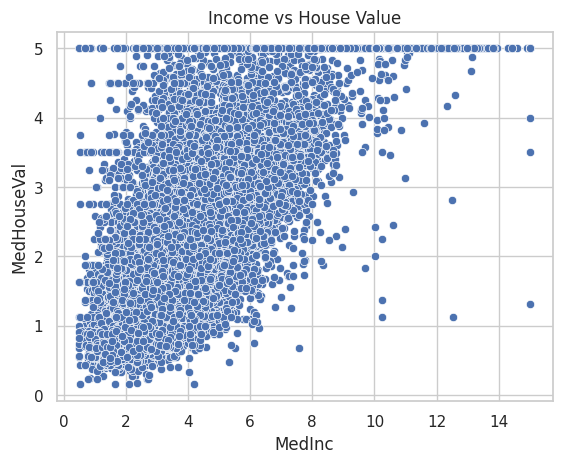

RMSE: 0.75
R² Score: 0.58


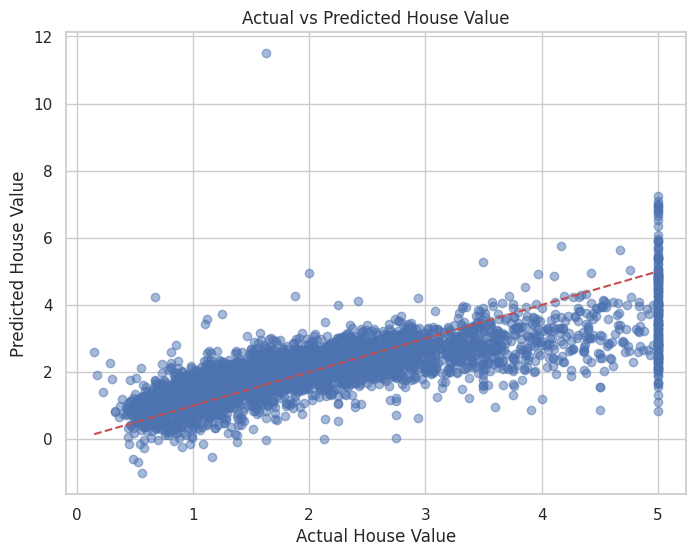

In [7]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set visual style
sns.set(style="whitegrid")

# 2. Load Dataset
# You can replace this with your own dataset, e.g., from Kaggle

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

# Preview data
df.head()

# 3. EDA - Basic Info
print(df.info())
print(df.describe())

# 4. EDA - Data Visualization

# Histogram of all features
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot between median income and house value
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title("Income vs House Value")
plt.show()


# 5. Feature Selection
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. Plotting Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Value")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()



In [15]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
dt_preds = dt_regressor.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_preds)

print(f"Decision Tree RMSE: {dt_rmse:.4f}")
print(f"Decision Tree R² Score: {dt_r2:.4f}")

Decision Tree RMSE: 0.7037
Decision Tree R² Score: 0.6221


In [16]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
rf_preds = rf_regressor.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest RMSE: 0.5053
Random Forest R² Score: 0.8051
